In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time
from scipy.io import wavfile
from scipy import signal
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
from datetime import datetime

# print python version
print(sys.version)
print("Python Environment:", os.path.basename(sys.exec_prefix))

# print time
print("last run", datetime.now())

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
Python Environment: vibrations
last run 2019-07-18 10:02:34.284451


In [9]:
dataDir= r"D:\Dropbox\AcademiaDropbox\Reviews\PeerJ_BuzzPollinationMexico"


In [45]:
log_rate, wave1 = wavfile.read(os.path.join(dataDir, "supplemental\peerj-38132-Supplemental_Audio_S1.wav"))
timesteps1 = np.linspace(0, len(wave1)/log_rate, num = len(wave1))

log_rate

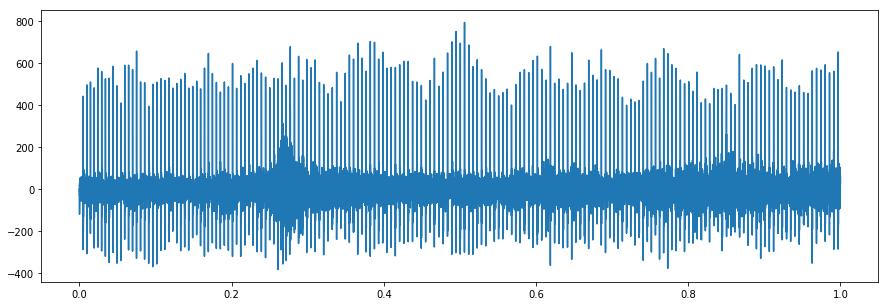

In [88]:
plt.figure(figsize=[15, 5])
sig = (wave1[10000:10000 + log_rate,1])
#sig = (wave1[10000:10000 + log_rate//4,1])
timesteps1 = np.linspace(0, len(sig)/log_rate, num = len(sig))
plt.plot(timesteps1, sig)

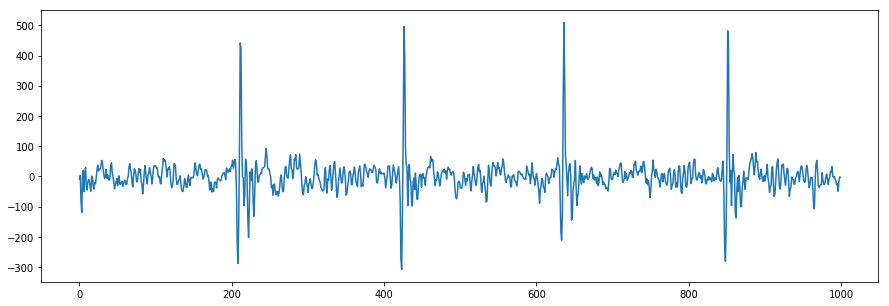

In [89]:
plt.figure(figsize=[15, 5])

plt.plot(sig[:1000])

In [90]:
def fft_fit(inputSignal, log_rate):
    '''
    Calculate Discrete Fourier Transform (DFT)
    
    Parameters: 
        inputSignal (array): timeseries on which to calculate DFT
        log_rate (int): samples per second of recorded signal
        
    Returns: 
        amplitudeAndPhase (array): complex numbers of the DFT
        frq (array): frequencies for the DFT
    '''
    
    # calculate fft frequencies   
    n = len(inputSignal)
    
    # get only positive frequencies
    frq = np.fft.fftfreq(n)[range(int(n/2))]*log_rate

    # fft computing and normalization (note that *2 is so that it is scaled properly)
    Y = np.fft.fft(inputSignal)/n 
    amplitudeAndPhase = Y[range(int(n/2))] *2
    return(amplitudeAndPhase, frq)

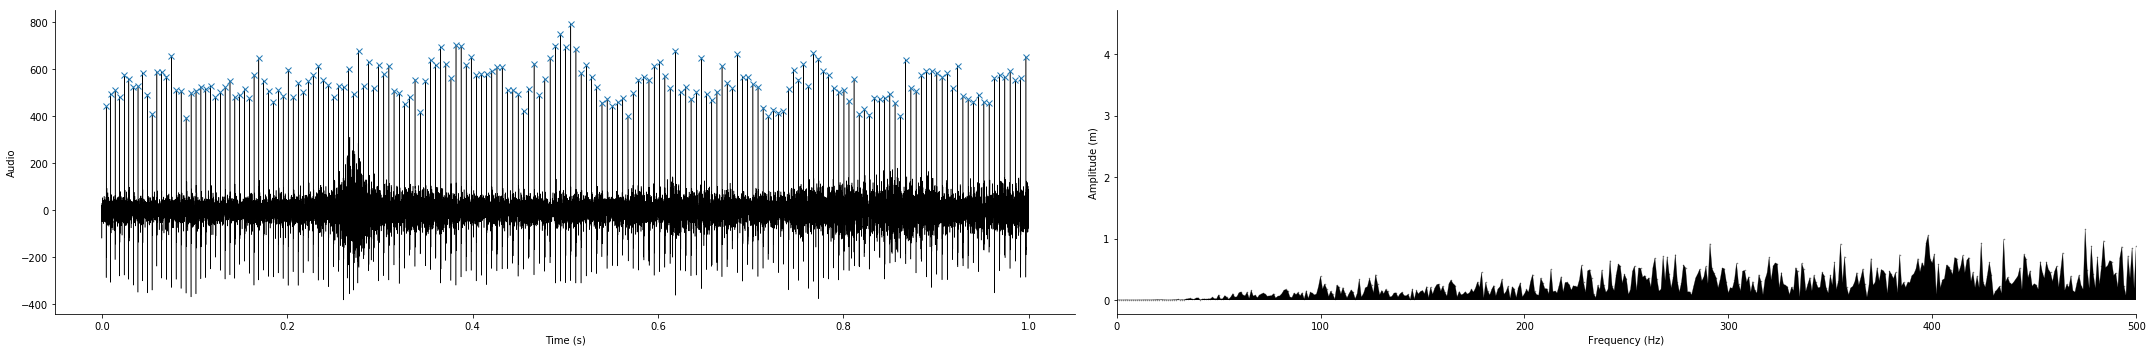

In [101]:

fig, (ax, ax1) = plt.subplots(1,2, figsize = [30,5])

plt.subplots_adjust(wspace=0.3)

# use FFT
amplitudeAndPhase, freq = fft_fit(sig, log_rate)

ax.plot(timesteps1, sig, c= "black", linewidth=0.5)
peaks, _ = find_peaks(sig, height=350)
ax.plot(timesteps1[peaks], sig[peaks], "x")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Audio")
ax.set_xlabel("Time (s)")

ax1.fill_between(freq, 0, np.abs(amplitudeAndPhase), color = "black", alpha = 1, lw = 0)
ax1.plot(freq, np.abs(amplitudeAndPhase), linewidth=0.5, c="black", alpha = 0.5, marker = "o", markersize= 0.5)



ax1.set_xlim(0, 500)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Amplitude (m)")
ax1.set_xlabel("Frequency (Hz)")
plt.tight_layout()

In [92]:
# find peaks
from scipy.signal import find_peaks

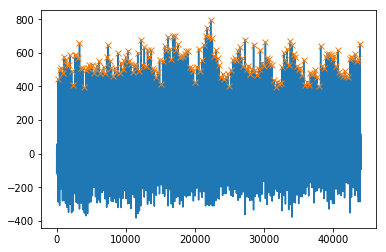

In [93]:
peaks, _ = find_peaks(sig, height=350)
plt.plot(sig)
plt.plot(peaks, sig[peaks], "x")

plt.show()

Text(0.5, 0, 'Time (sec)')

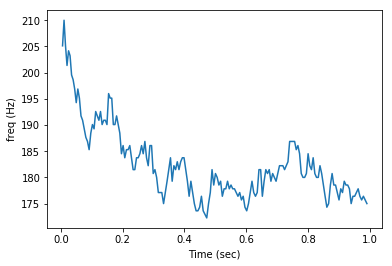

In [105]:
# instantaneous freq
plt.plot(timesteps1[peaks][:-1], 1/np.diff(peaks/log_rate))
plt.ylabel("freq (Hz)")
plt.xlabel("Time (sec)")

In [36]:
# apply window
wave1 = sig
timesteps1 = timesteps1[0:len(wave1)]
wave1 = (pd.Series(wave1).rolling(window=80, min_periods=1, center = True).std()*2).values
wave1 -= np.mean(wave1)
#wave1 = np.hanning(len(wave1)) * wave1

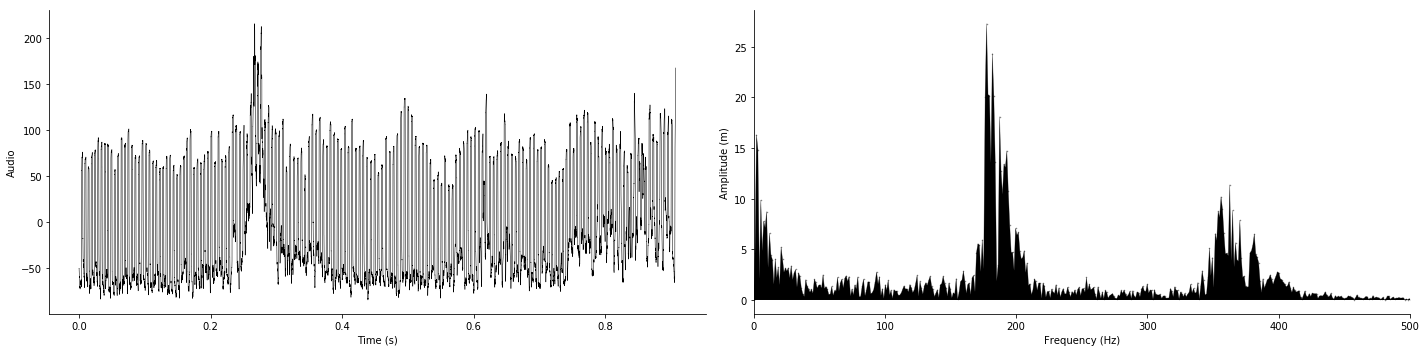

In [39]:
fig, (ax, ax1) = plt.subplots(1,2, figsize = [20,5])

plt.subplots_adjust(wspace=0.3)

# use FFT
amplitudeAndPhase, freq = fft_fit(wave1, log_rate)

ax.plot(timesteps1, wave1, c= "black", linewidth=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Audio")
ax.set_xlabel("Time (s)")

ax1.fill_between(freq, 0, np.abs(amplitudeAndPhase), color = "black", alpha = 1, lw = 0)
ax1.plot(freq, np.abs(amplitudeAndPhase), linewidth=0.5, c="black", alpha = 0.5, marker = "o", markersize= 0.5)

ax1.set_xlim(0, 500)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Amplitude (m)")
ax1.set_xlabel("Frequency (Hz)")
plt.tight_layout()

In [52]:
sigThresh = (sig > 350 )* 1.0

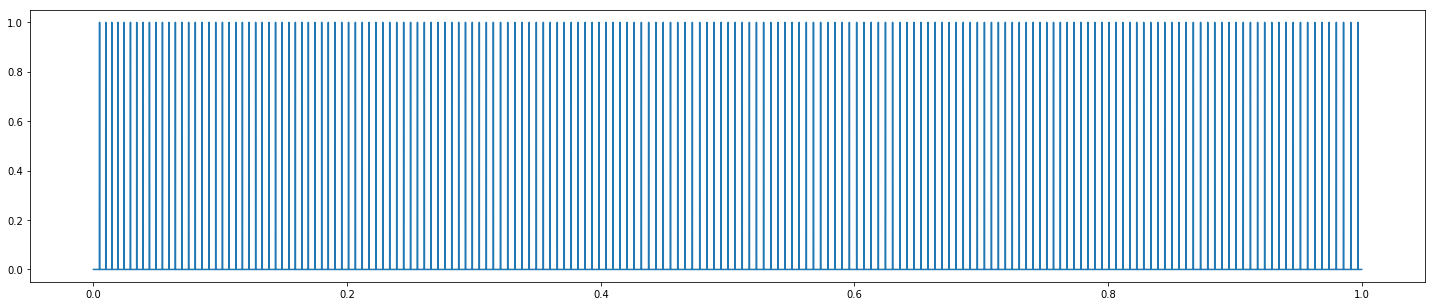

In [54]:
plt.figure(figsize=[25, 5])

plt.plot(timesteps1, sigThresh)

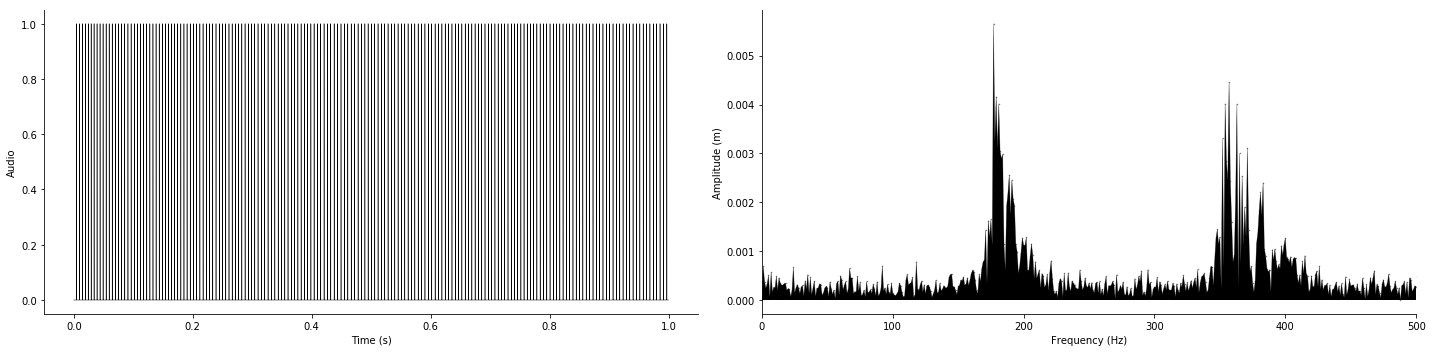

In [58]:
fig, (ax, ax1) = plt.subplots(1,2, figsize = [20,5])

plt.subplots_adjust(wspace=0.3)

# use FFT
amplitudeAndPhase, freq = fft_fit(sigThresh-np.mean(sigThresh), log_rate)

ax.plot(timesteps1, sigThresh, c= "black", linewidth=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Audio")
ax.set_xlabel("Time (s)")

ax1.fill_between(freq, 0, np.abs(amplitudeAndPhase), color = "black", alpha = 1, lw = 0)
ax1.plot(freq, np.abs(amplitudeAndPhase), linewidth=0.5, c="black", alpha = 0.5, marker = "o", markersize= 0.5)


ax1.set_xlim(0, 500)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Amplitude (m)")
ax1.set_xlabel("Frequency (Hz)")
plt.tight_layout()

In [ ]:
# read in flight



In [106]:
log_rate, wave1 = wavfile.read(os.path.join(dataDir, "supplemental\peerj-38132-Supplemental_Audio_S2.wav")) #bombus
timesteps1 = np.linspace(0, len(wave1)/log_rate, num = len(wave1))

log_rate

44100

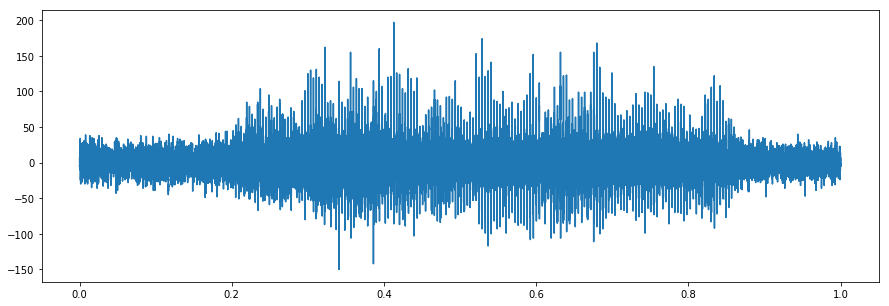

In [137]:
start = 20 # seconds  # 22 seconds is wingbeat of bombus



plt.figure(figsize=[15, 5])
sig = (wave1[start*log_rate:(start*log_rate + log_rate),1])

timesteps1 = np.linspace(0, len(sig)/log_rate, num = len(sig))
plt.plot(timesteps1, sig)

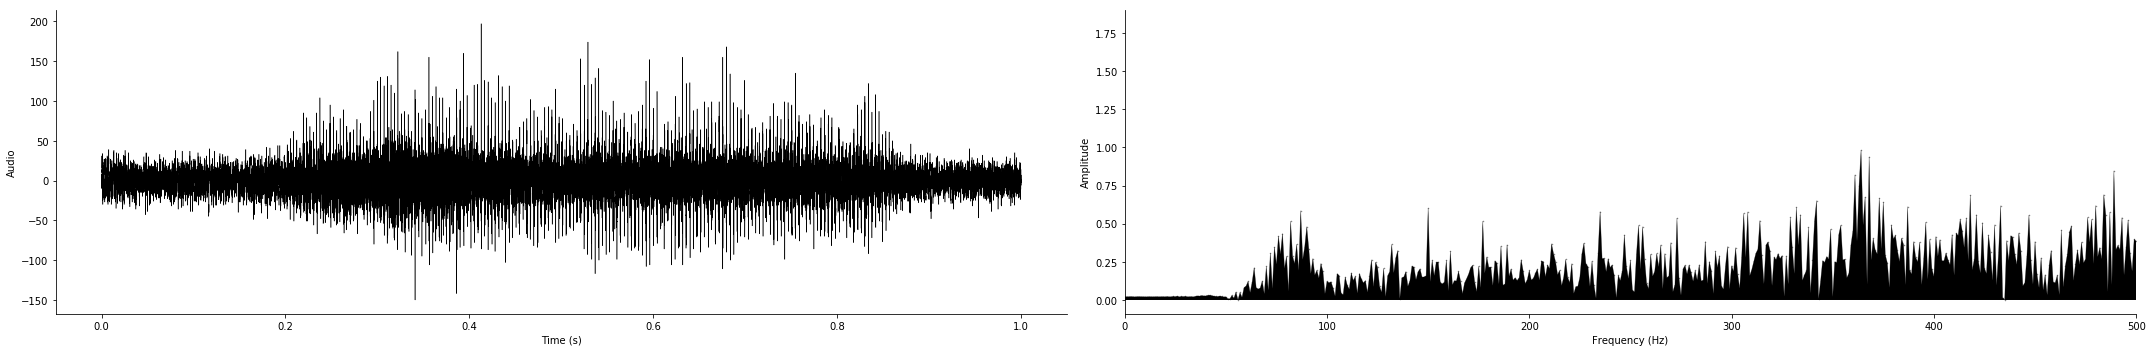

In [138]:

fig, (ax, ax1) = plt.subplots(1,2, figsize = [30,5])

plt.subplots_adjust(wspace=0.3)

# use FFT
amplitudeAndPhase, freq = fft_fit(sig, log_rate)

ax.plot(timesteps1, sig, c= "black", linewidth=0.5)
# peaks, _ = find_peaks(sig, height=350)
# ax.plot(timesteps1[peaks], sig[peaks], "x")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Audio")
ax.set_xlabel("Time (s)")

ax1.fill_between(freq, 0, np.abs(amplitudeAndPhase), color = "black", alpha = 1, lw = 0)
ax1.plot(freq, np.abs(amplitudeAndPhase), linewidth=0.5, c="black", alpha = 0.5, marker = "o", markersize= 0.5)



ax1.set_xlim(0, 500)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequency (Hz)")
plt.tight_layout()

In [141]:
def butter_highpass(log_rate, cutoff, order=5):
    nyq = 0.5 * log_rate
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b,a

def butter_highpass_filter(sigToFilter, cutoff = 200, order=5, log_rate = log_rate):
    b, a = butter_highpass(log_rate, cutoff)
    y = signal.filtfilt(b, a, sigToFilter)
    y -= np.mean(y)
    return y



filteredSig = butter_highpass_filter(sigToFilter= sig, cutoff = 5000)


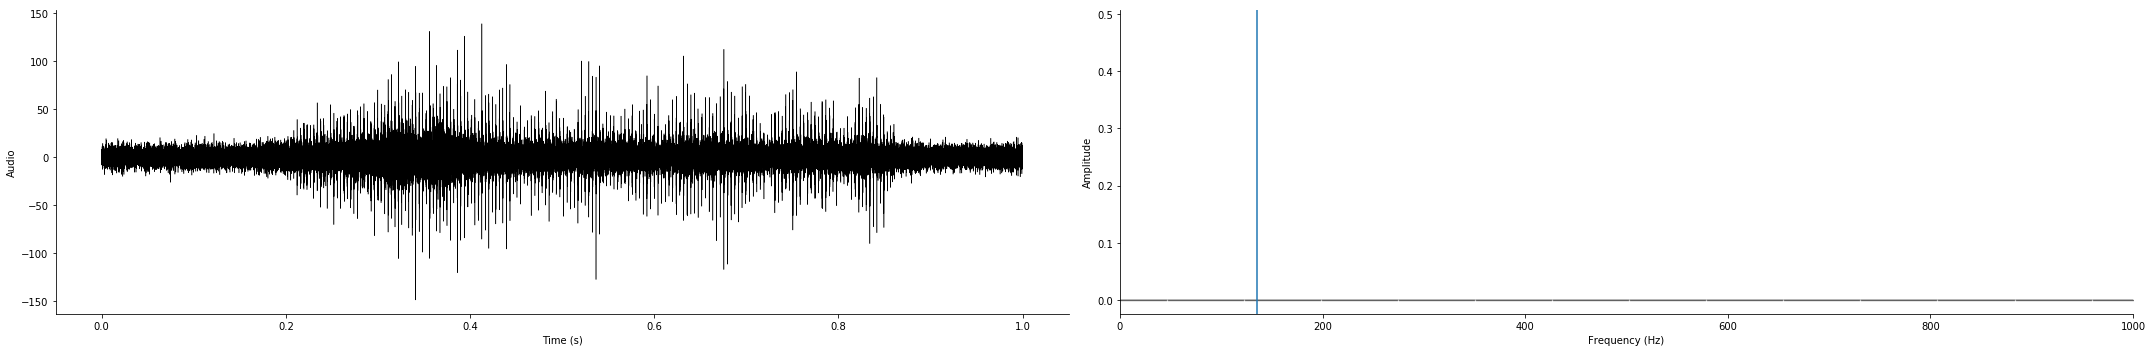

In [142]:

fig, (ax, ax1) = plt.subplots(1,2, figsize = [30,5])

plt.subplots_adjust(wspace=0.3)

# use FFT
amplitudeAndPhase, freq = fft_fit(filteredSig, log_rate)

ax.plot(timesteps1, filteredSig, c= "black", linewidth=0.5)
# peaks, _ = find_peaks(sig, height=350)
# ax.plot(timesteps1[peaks], sig[peaks], "x")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Audio")
ax.set_xlabel("Time (s)")

ax1.fill_between(freq, 0, np.abs(amplitudeAndPhase), color = "black", alpha = 1, lw = 0)
ax1.plot(freq, np.abs(amplitudeAndPhase), linewidth=0.5, c="black", alpha = 0.5, marker = "o", markersize= 0.5)
ax1.axvline(135)



ax1.set_xlim(0, 1000)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequency (Hz)")
plt.tight_layout()

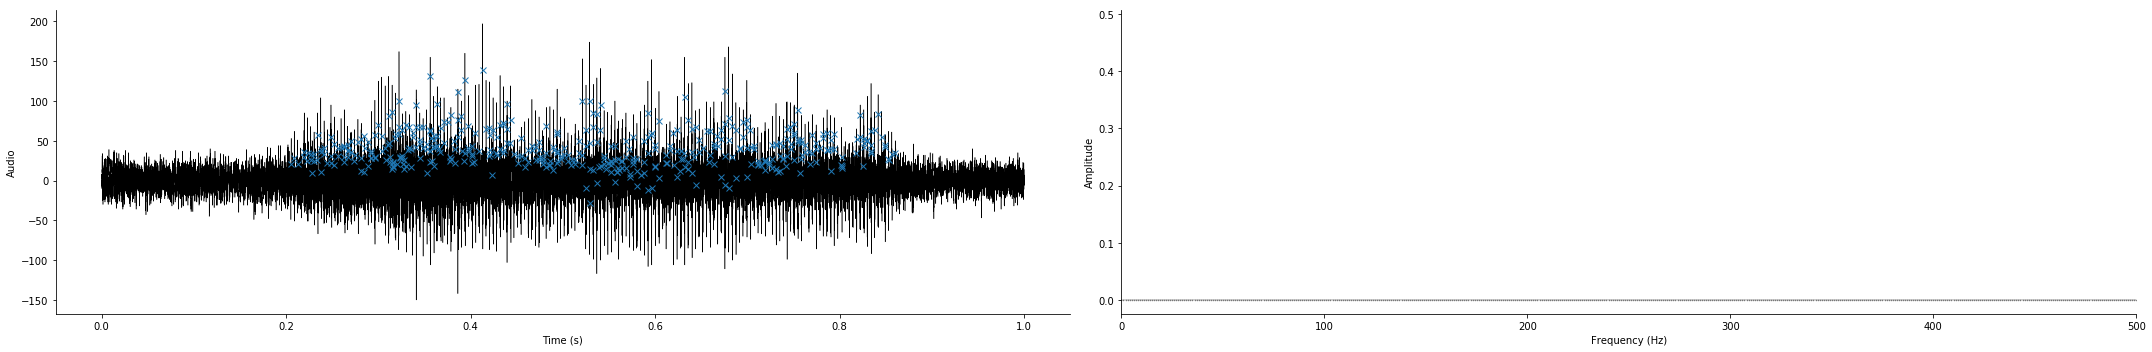

In [146]:
# look at bombus buzzes

fig, (ax, ax1) = plt.subplots(1,2, figsize = [30,5])

plt.subplots_adjust(wspace=0.3)

# use FFT
amplitudeAndPhase, freq = fft_fit(filteredSig, log_rate)

ax.plot(timesteps1, sig, c= "black", linewidth=0.5)
peaks, _ = find_peaks(sig, height=50)
ax.plot(timesteps1[peaks], filteredSig[peaks], "x")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Audio")
ax.set_xlabel("Time (s)")

ax1.fill_between(freq, 0, np.abs(amplitudeAndPhase), color = "black", alpha = 1, lw = 0)
ax1.plot(freq, np.abs(amplitudeAndPhase), linewidth=0.5, c="black", alpha = 0.5, marker = "o", markersize= 0.5)



ax1.set_xlim(0, 500)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequency (Hz)")
plt.tight_layout()


In [149]:
# apply window
wave1 = sig
timesteps1 = timesteps1[0:len(wave1)]
wave1 = (pd.Series(wave1).rolling(window=20, min_periods=1, center = True).std()*2).values
wave1 -= np.mean(wave1)
#wave1 = np.hanning(len(wave1)) * wave1

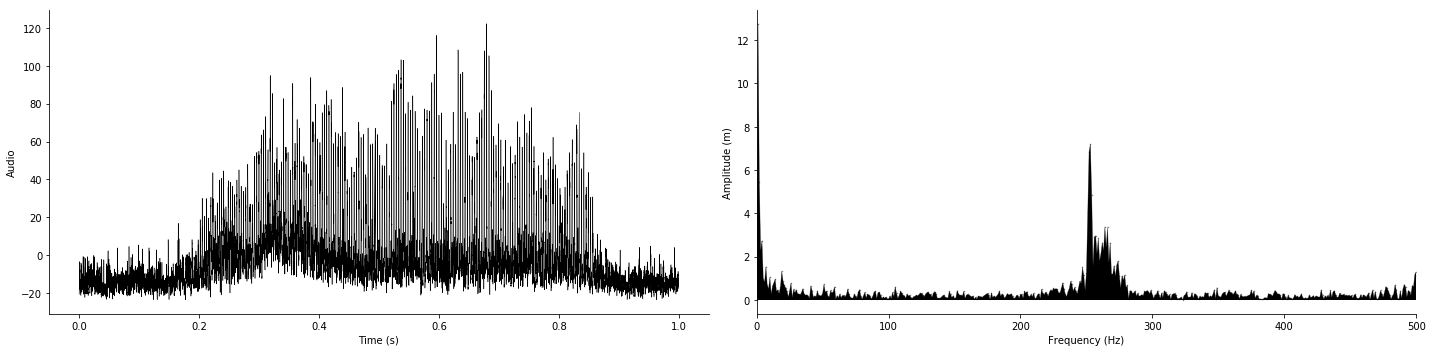

In [150]:
fig, (ax, ax1) = plt.subplots(1,2, figsize = [20,5])

plt.subplots_adjust(wspace=0.3)

# use FFT
amplitudeAndPhase, freq = fft_fit(wave1, log_rate)

ax.plot(timesteps1, wave1, c= "black", linewidth=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Audio")
ax.set_xlabel("Time (s)")

ax1.fill_between(freq, 0, np.abs(amplitudeAndPhase), color = "black", alpha = 1, lw = 0)
ax1.plot(freq, np.abs(amplitudeAndPhase), linewidth=0.5, c="black", alpha = 0.5, marker = "o", markersize= 0.5)

ax1.set_xlim(0, 500)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Amplitude (m)")
ax1.set_xlabel("Frequency (Hz)")
plt.tight_layout()